In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import csv
import random
import matplotlib.pyplot as plt
import statistics 
from scipy import stats
import io
import time#for recording time 
import sys #for getting size of object
!pip install texttable
from texttable import Texttable
import math
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### Importing files

In [2]:
url = 'https://raw.githubusercontent.com/sobhan-moosavi/varicella_study/main/POLYMOD_raw.csv'
POLYMOD=pd.read_csv(url,header=0,engine='python')
url2='https://raw.githubusercontent.com/sobhan-moosavi/varicella_study/main/POLYMOD_raw_participants.csv'
Participants= pd.read_csv(url2,header=0,engine='python')

In [3]:
#putting data from participants into dictionary
Participant_data=dict()
for i, row in Participants.iterrows():
    Participant_data[row[0]]=dict()
    Participant_data[row[0]]['age']=row[2]
    Participant_data[row[0]]['gender']=row[3]
    

In [4]:
#building empty dictionary for storing data {setting:{sex:{frequecy}}}
setting=['home','school','work','other']
frequency=[1,2,3,4,5,'tot']
sex=['F','M','T']
dic_frequency=dict()
for i in setting:
    dic_frequency[i]=dict()
    for j in sex:
        dic_frequency[i][j]=dict()
        for k in frequency:
            dic_frequency[i][j][k]=0

In [5]:
#counting number of contact in each frequency for each gender in each setting
# row[5] #gender row[6]#home row[7]#work row[8]#school row[9:11]#other row[12]#frequency

count=0

for i, row in POLYMOD.iterrows():
    count+=1
    #home
    if row[6]==True and math.isnan(row[12])==False and type(Participant_data[row[0]]['gender'])==str:
        
        dic_frequency['home'][Participant_data[row[0]]['gender']][row[12]]+=1
        dic_frequency['home']['T'][row[12]]+=1
        
        dic_frequency['home'][Participant_data[row[0]]['gender']]['tot']+=1
        dic_frequency['home']['T']['tot']+=1
    #work    
    if row[7]==True and math.isnan(row[12])==False and type(Participant_data[row[0]]['gender'])==str:
        
        dic_frequency['work'][Participant_data[row[0]]['gender']][row[12]]+=1
        dic_frequency['work']['T'][row[12]]+=1
        
        dic_frequency['work'][Participant_data[row[0]]['gender']]['tot']+=1
        dic_frequency['work']['T']['tot']+=1
     #school   
    if row[8]==True and math.isnan(row[12])==False and type(Participant_data[row[0]]['gender'])==str:
        
        dic_frequency['school'][Participant_data[row[0]]['gender']][row[12]]+=1
        dic_frequency['school']['T'][row[12]]+=1
        
        dic_frequency['school'][Participant_data[row[0]]['gender']]['tot']+=1
        dic_frequency['school']['T']['tot']+=1
     #other   
    if sum(row[9:11])>0 and math.isnan(row[12])==False and type(Participant_data[row[0]]['gender'])==str:
        
        dic_frequency['other'][Participant_data[row[0]]['gender']][row[12]]+=1
        dic_frequency['other']['T'][row[12]]+=1
        
        dic_frequency['other'][Participant_data[row[0]]['gender']]['tot']+=1
        dic_frequency['other']['T']['tot']+=1

In [6]:
#changing counts to percentage
for i in dic_frequency.keys():
    for j in dic_frequency[i].keys():
        for k in dic_frequency[i][j].keys():
            dic_frequency[i][j][k]=dic_frequency[i][j][k]/dic_frequency[i][j]['tot']

In [7]:
for i in dic_frequency.keys():
    print(i)
    for j in dic_frequency[i].keys():
        print(j)
        print(dic_frequency[i][j])

home
F
{1: 0.6942670537010159, 2: 0.16400580551523947, 3: 0.09143686502177069, 4: 0.03737300435413643, 5: 0.012917271407837445, 'tot': 1.0}
M
{1: 0.7197890977123905, 2: 0.1478867250616549, 3: 0.08512628624883069, 4: 0.03444170422654988, 5: 0.01275618675057403, 'tot': 1.0}
T
{1: 0.7060182466032343, 2: 0.15658404792670033, 3: 0.08853126590704413, 4: 0.03602333685735542, 5: 0.012843102705665844, 'tot': 1.0}
school
F
{1: 0.6994230411315838, 2: 0.24772008189093617, 3: 0.027265959426763447, 4: 0.013865624418388237, 5: 0.011725293132328308, 'tot': 1.0}
M
{1: 0.7383089770354906, 2: 0.21597077244258872, 3: 0.02630480167014614, 4: 0.011795407098121085, 5: 0.0076200417536534445, 'tot': 1.0}
T
{1: 0.7177506641739644, 2: 0.2327560759618223, 3: 0.02681294893240185, 4: 0.012889894716127127, 5: 0.009790416215684345, 'tot': 1.0}
work
F
{1: 0.4700778642936596, 2: 0.27374860956618463, 3: 0.103559510567297, 4: 0.05917686318131257, 5: 0.09343715239154617, 'tot': 1.0}
M
{1: 0.48301715324321254, 2: 0.2528683

In [8]:
#counting number of contact in each frequency for each age in each setting

age_frequency={'home':{},'school':{},'work':{},'other':{}}
for i, row in POLYMOD.iterrows():
    if math.isnan(row[12])==False and math.isnan(Participant_data[row[0]]['age'])==False and row[6]==True:
        
        if Participant_data[row[0]]['age'] in list(age_frequency['home'].keys()):
            age_frequency['home'][Participant_data[row[0]]['age']][row[12]]+=1
            age_frequency['home'][Participant_data[row[0]]['age']]['tot']+=1
        else:
            age_frequency['home'][Participant_data[row[0]]['age']]={1:0,2:0,3:0,4:0,5:0,'tot':0}
            age_frequency['home'][Participant_data[row[0]]['age']][row[12]] +=1
            age_frequency['home'][Participant_data[row[0]]['age']]['tot'] +=1
            
    if math.isnan(row[12])==False and math.isnan(Participant_data[row[0]]['age'])==False and row[7]==True:
        if Participant_data[row[0]]['age'] in list(age_frequency['work'].keys()):
            age_frequency['work'][Participant_data[row[0]]['age']][row[12]]+=1
            age_frequency['work'][Participant_data[row[0]]['age']]['tot']+=1
        else:
            age_frequency['work'][Participant_data[row[0]]['age']]={1:0,2:0,3:0,4:0,5:0,'tot':0}
            age_frequency['work'][Participant_data[row[0]]['age']][row[12]] +=1
            age_frequency['work'][Participant_data[row[0]]['age']]['tot'] +=1
            
    if math.isnan(row[12])==False and math.isnan(Participant_data[row[0]]['age'])==False and row[8]==True:
        if Participant_data[row[0]]['age'] in list(age_frequency['school'].keys()):
            age_frequency['school'][Participant_data[row[0]]['age']][row[12]]+=1
            age_frequency['school'][Participant_data[row[0]]['age']]['tot']+=1
        else:
            age_frequency['school'][Participant_data[row[0]]['age']]={1:0,2:0,3:0,4:0,5:0,'tot':0}
            age_frequency['school'][Participant_data[row[0]]['age']][row[12]] +=1
            age_frequency['school'][Participant_data[row[0]]['age']]['tot'] +=1
            
    if math.isnan(row[12])==False and math.isnan(Participant_data[row[0]]['age'])==False and sum(row[9:11])>0:
        if Participant_data[row[0]]['age'] in list(age_frequency['other'].keys()):
            age_frequency['other'][Participant_data[row[0]]['age']][row[12]]+=1
            age_frequency['other'][Participant_data[row[0]]['age']]['tot']+=1
        else:
            age_frequency['other'][Participant_data[row[0]]['age']]={1:0,2:0,3:0,4:0,5:0,'tot':0}
            age_frequency['other'][Participant_data[row[0]]['age']][row[12]] +=1
            age_frequency['other'][Participant_data[row[0]]['age']]['tot'] +=1
            
        
            
        

In [9]:
for i in age_frequency:
    for j in  age_frequency[i].keys():
        for k in age_frequency[i][j].keys():
            age_frequency[i][j][k]=age_frequency[i][j][k]/age_frequency[i][j]['tot']
        

black-daily red-weekly blue-monthly green-random 


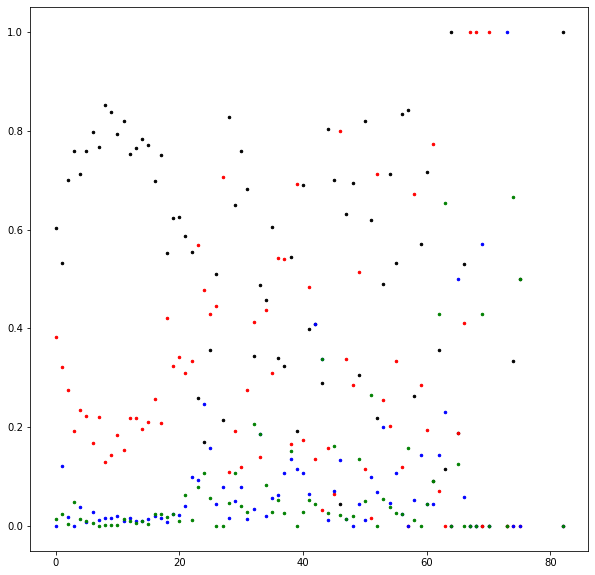

In [10]:
#plot of ratio of contact ,stratified by age and frequency for any chosen setting

setting='school'
print('black-daily red-weekly blue-monthly green-random ')
for i in sorted(list(age_frequency[setting].keys())):
    plt.plot(i,age_frequency[setting][i][1],'k.',linewidth=.5, markersize=5,alpha=1)
    plt.plot(i,age_frequency[setting][i][2],'r.',linewidth=.5, markersize=5,alpha=1)
    plt.plot(i,age_frequency[setting][i][3],'b.',linewidth=.5, markersize=5,alpha=1)
    plt.plot(i,age_frequency[setting][i][4]+age_frequency[setting][i][5],'g.',linewidth=.5, markersize=5,alpha=1)


In [11]:
#putting ages into buckets
age_groups=[['0_4', 0, 4], ['5_9', 5, 9], ['10_14', 10, 14], ['15_19', 15, 19], ['20_24', 20, 24], ['25_29', 25, 29], ['30_34', 30, 34], ['35_39', 35, 39], ['40_44', 40, 44], ['45_49', 45, 49], ['50_54', 50, 54], ['55_59', 55, 59], ['60_64', 60, 64], ['65_69', 65, 69], ['70_74', 70, 74], ['75+', 75, 79], ['0_4', 0, 4], ['5_9', 5, 9], ['10_14', 10, 14], ['15_19', 15, 19], ['20_24', 20, 24], ['25_29', 25, 29], ['30_34', 30, 34], ['35_39', 35, 39], ['40_44', 40, 44], ['45_49', 45, 49], ['50_54', 50, 54], ['55_59', 55, 59], ['60_64', 60, 64], ['65_69', 65, 69], ['70_74', 70, 74], ['75_100', 75, 100]]
age_frequency_grouped={'home':{},'school':{},'work':{},'other':{}}
for i, row in POLYMOD.iterrows():
    if math.isnan(row[12])==False and math.isnan(Participant_data[row[0]]['age'])==False and row[6]==True:
        
        for j in age_groups :
            
            if Participant_data[row[0]]['age']<=j[2] and Participant_data[row[0]]['age']>=j[1]:
        
                if j[0] in list(age_frequency_grouped['home'].keys()):
                    age_frequency_grouped['home'][j[0]][row[12]]+=1
                    age_frequency_grouped['home'][j[0]]['tot']+=1
                else:
                    age_frequency_grouped['home'][j[0]]={1:0,2:0,3:0,4:0,5:0,'tot':0}
                    age_frequency_grouped['home'][j[0]][row[12]] +=1
                    age_frequency_grouped['home'][j[0]]['tot'] +=1
            
    if math.isnan(row[12])==False and math.isnan(Participant_data[row[0]]['age'])==False and row[7]==True:
        
        for j in age_groups :
            
            if Participant_data[row[0]]['age']<=j[2] and Participant_data[row[0]]['age']>=j[1]:
                
                if j[0] in list(age_frequency_grouped['work'].keys()):
                    age_frequency_grouped['work'][j[0]][row[12]]+=1
                    age_frequency_grouped['work'][j[0]]['tot']+=1
                else:
                    age_frequency_grouped['work'][j[0]]={1:0,2:0,3:0,4:0,5:0,'tot':0}
                    age_frequency_grouped['work'][j[0]][row[12]] +=1
                    age_frequency_grouped['work'][j[0]]['tot'] +=1
            
    if math.isnan(row[12])==False and math.isnan(Participant_data[row[0]]['age'])==False and row[8]==True:
        
        for j in age_groups :
            
            if Participant_data[row[0]]['age']<=j[2] and Participant_data[row[0]]['age']>=j[1]:

                if j[0] in list(age_frequency_grouped['school'].keys()):
                    age_frequency_grouped['school'][j[0]][row[12]]+=1
                    age_frequency_grouped['school'][j[0]]['tot']+=1
                else:
                    age_frequency_grouped['school'][j[0]]={1:0,2:0,3:0,4:0,5:0,'tot':0}
                    age_frequency_grouped['school'][j[0]][row[12]] +=1
                    age_frequency_grouped['school'][j[0]]['tot'] +=1
            
    if math.isnan(row[12])==False and math.isnan(Participant_data[row[0]]['age'])==False and sum(row[9:11])>0:
        
        for j in age_groups :
            
            if Participant_data[row[0]]['age']<=j[2] and Participant_data[row[0]]['age']>=j[1]:
                
                if j[0] in list(age_frequency_grouped['other'].keys()):
                    age_frequency_grouped['other'][j[0]][row[12]]+=1
                    age_frequency_grouped['other'][j[0]]['tot']+=1
                else:
                    age_frequency_grouped['other'][j[0]]={1:0,2:0,3:0,4:0,5:0,'tot':0}
                    age_frequency_grouped['other'][j[0]][row[12]] +=1
                    age_frequency_grouped['other'][j[0]]['tot'] +=1

In [12]:
for i in age_frequency_grouped:
    for j in  age_frequency_grouped[i].keys():
        for k in age_frequency_grouped[i][j].keys():
            age_frequency_grouped[i][j][k]=age_frequency_grouped[i][j][k]/age_frequency_grouped[i][j]['tot']

black-daily red-weekly blue-monthly green-random 


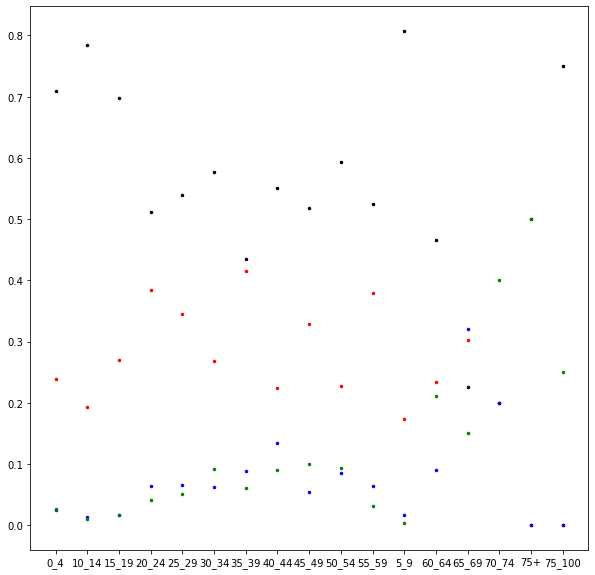

In [13]:
setting='school'
print('black-daily red-weekly blue-monthly green-random ')
for i in sorted(list(age_frequency_grouped[setting].keys())):
    plt.plot(i,age_frequency_grouped[setting][i][1],'k.',linewidth=.5, markersize=5,alpha=1)
    plt.plot(i,age_frequency_grouped[setting][i][2],'r.',linewidth=.5, markersize=5,alpha=1)
    plt.plot(i,age_frequency_grouped[setting][i][3],'b.',linewidth=.5, markersize=5,alpha=1)
    plt.plot(i,age_frequency_grouped[setting][i][4]+age_frequency_grouped[setting][i][5],'g.',linewidth=.5, markersize=5,alpha=1)

In [14]:
#building list of nodes with their number of contacts in each setting
#for finding pattern of number of connections
Number_contact={}


for i, row in POLYMOD.iterrows():
    
    if row[0] > len(list(Number_contact.keys())) : #if we've moved to new node
        
        Number_contact[row[0]]={'age':Participant_data[row[0]]['age'],'home':{1:0,2:0,3:0,4:0,5:0,'tot':0},'school':{1:0,2:0,3:0,4:0,5:0,'tot':0},'work':{1:0,2:0,3:0,4:0,5:0,'tot':0},'other':{1:0,2:0,3:0,4:0,5:0,'tot':0}}
    
    if math.isnan(row[12])==False and math.isnan(row[2])==False and row[6]==True:

        
        Number_contact[row[0]]['home'][row[12]]+=1
        Number_contact[row[0]]['home']['tot']+=1
        

    if math.isnan(row[12])==False and math.isnan(row[2])==False and row[7]==True:
        
        Number_contact[row[0]]['work'][row[12]]+=1
        Number_contact[row[0]]['work']['tot']+=1
       

    if math.isnan(row[12])==False and math.isnan(row[2])==False and row[8]==True:
        
        Number_contact[row[0]]['school'][row[12]]+=1
        Number_contact[row[0]]['school']['tot']+=1
       

    if math.isnan(row[12])==False and math.isnan(row[2])==False and sum(row[9:11])>0:
        
        Number_contact[row[0]]['other'][row[12]]+=1
        Number_contact[row[0]]['other']['tot']+=1
        
#putting ages into buckets
age_groups=[['0_4', 0, 4], ['5_9', 5, 9], ['10_14', 10, 14], ['15_19', 15, 19], ['20_24', 20, 24], ['25_29', 25, 29], ['30_34', 30, 34], ['35_39', 35, 39], ['40_44', 40, 44], ['45_49', 45, 49], ['50_54', 50, 54], ['55_59', 55, 59], ['60_64', 60, 64], ['65_69', 65, 69], ['70_74', 70, 74], ['75_79', 75, 79], ['0_4', 0, 4], ['5_9', 5, 9], ['10_14', 10, 14], ['15_19', 15, 19], ['20_24', 20, 24], ['25_29', 25, 29], ['30_34', 30, 34], ['35_39', 35, 39], ['40_44', 40, 44], ['45_49', 45, 49], ['50_54', 50, 54], ['55_59', 55, 59], ['60_64', 60, 64], ['65_69', 65, 69], ['70_74', 70, 74], ['75+', 75, 100]] 
for i in Number_contact.keys():
    bucket = False
    for j in age_groups :
        if bucket== False and Number_contact[i]['age'] <= j[2] and Number_contact[i]['age']>=j[1]:
            Number_contact[i]['age']=j[0]
            bucket=True
            

In [15]:
table=Texttable()
table.set_deco(Texttable.HEADER)
table.add_rows([['age','setting','frequency','skewness']])      
print(table.draw())
dict_list_contact={}

for a in age_groups:
    dict_list_contact[a[0]]={'home':{1:[],2:[],3:[],4:[],5:[],'tot':[]},'school':{1:[],2:[],3:[],4:[],5:[],'tot':[]},'work':{1:[],2:[],3:[],4:[],5:[],'tot':[]},'other':{1:[],2:[],3:[],4:[],5:[],'tot':[]}}
    for n in Number_contact.keys():
        if Number_contact[n]['age']==a[0]:
            for s in ['home','school','work','other']:
                for f in [1,2,3,4,5,'tot']:
                    dict_list_contact[a[0]][s][f].append(Number_contact[n][s][f])
                    
skewness_dict=dict()                    
for a in dict_list_contact.keys():
    skewness_dict[a]=dict()
    for s in dict_list_contact[a].keys():
        skewness_dict[a][s]=dict()
        for f in dict_list_contact[a][s].keys():
            skewness_dict[a][s][f]=stats.skew(dict_list_contact[a][s][f])
            
for a in skewness_dict.keys(): 
    for s in skewness_dict[a].keys():
        for f in skewness_dict[a][s].keys():
            
            table.add_rows([[a,s,f,'%f' % skewness_dict[a][s][f]]])

            print(table.draw())       
    

age   setting   frequency   skewness
0_4    home         1       1.279506
0_4    home         2       2.950707
0_4    home         3       8.463162
0_4    home         4       5.554935
0_4    home         5       21.87400
                               4    
0_4    home        tot      1.875096
0_4   school        1       4.346209
0_4   school        2       8.050330
0_4   school        3       22.69918
                               1    
0_4   school        4       25.33938
                               0    
0_4   school        5       14.31797
                               4    
0_4   school       tot      3.806461
0_4    work         1       17.36865
                               4    
0_4    work         2       25.59299
                               8    
0_4    work         3       18.05555
                               5    
0_4    work         4       0.000000
0_4    work         5       25.59299
                               8    
0_4    work        tot      20.84014
 

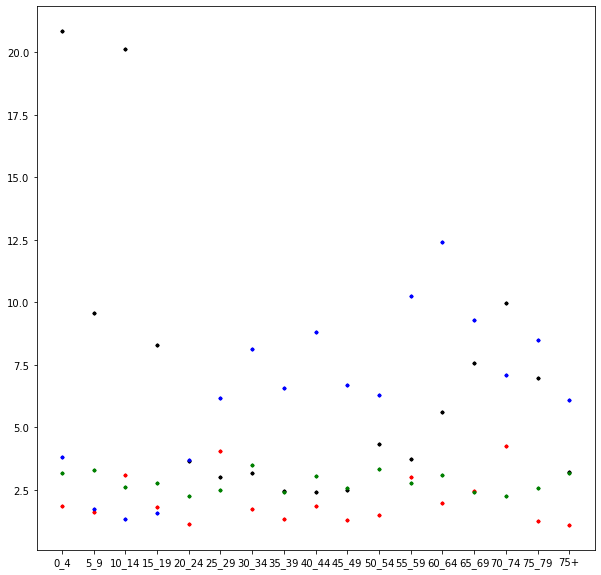

In [16]:
#graph of skewness for different ages at different settings
plt.rcParams["figure.figsize"] = (10,10)
for a in skewness_dict.keys():
    for s in skewness_dict[a].keys():
            
            plt.plot(a,skewness_dict[a]['work']['tot'],'k.',linewidth=.5, markersize=5,alpha=1)
            plt.plot(a,skewness_dict[a]['home']['tot'],'r.',linewidth=.5, markersize=5,alpha=1)
            plt.plot(a,skewness_dict[a]['school']['tot'],'b.',linewidth=.5, markersize=5,alpha=1)
            plt.plot(a,skewness_dict[a]['other']['tot'],'g.',linewidth=.5, markersize=5,alpha=1)
    

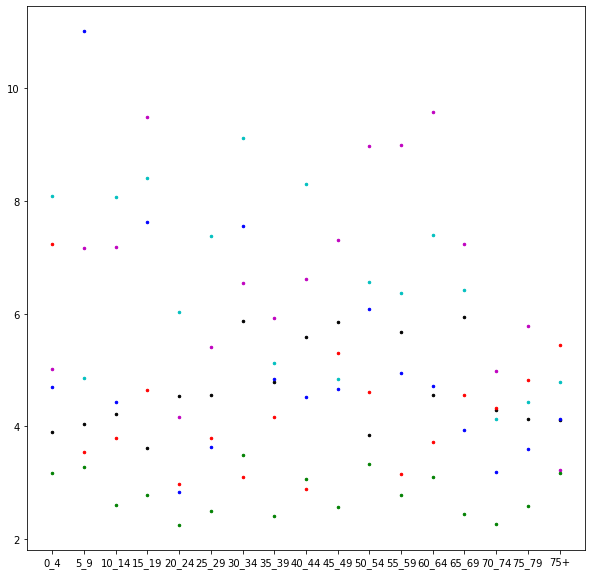

In [17]:
#graph of skewness for different frequencies at different ages in one setting                
setting_ = 'other'
for a in skewness_dict.keys():
    for s in skewness_dict[a].keys():
        if s == setting_ :
            
            plt.plot(a,skewness_dict[a][s][1],'k.',linewidth=.5, markersize=5,alpha=1)
            plt.plot(a,skewness_dict[a][s][2],'r.',linewidth=.5, markersize=5,alpha=1)
            plt.plot(a,skewness_dict[a][s][3],'b.',linewidth=.5, markersize=5,alpha=1)
            plt.plot(a,skewness_dict[a][s][4],'c.',linewidth=.5, markersize=5,alpha=1)
            plt.plot(a,skewness_dict[a][s][5],'m.',linewidth=.5, markersize=5,alpha=1)
            plt.plot(a,skewness_dict[a][s]['tot'],'g.',linewidth=.5, markersize=5,alpha=1)

In [18]:
#exporting skewness to csv
skewness_output ={'age':[],'setting':[],'skewness':[]}
for a in skewness_dict.keys():
    for s in skewness_dict[a].keys():
        skewness_output['age'].append(a)
        skewness_output['setting'].append(s)
        skewness_output['skewness'].append(skewness_dict[a][s]['tot'])
skewness_df= pd.DataFrame(skewness_output)    
#skewness_df.to_csv('skewness.csv', index = False)    

/home/msi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


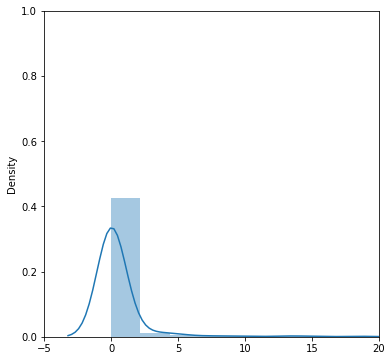

In [25]:
#graph of distribution for a specified setting,age,frequency
s='school'
a='40_44'
f='tot'

plt.rcParams["figure.figsize"] = (6,6)
sns.distplot(dict_list_contact[a][s][f])

plt.axis([-5,20,0,1])
plt.show()

/home/msi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


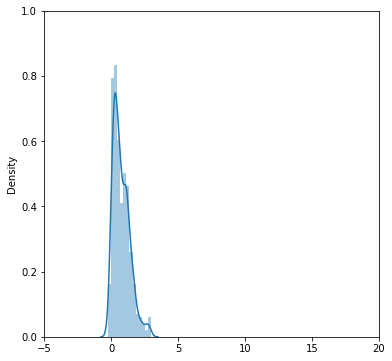

0.7956525236533627
0.748868778280543


In [29]:
x=stats.skewnorm.rvs(skewness_dict[a][s][f], loc=0, scale=1, size=len(dict_list_contact[a][s][f]), random_state=None)
plt.rcParams["figure.figsize"] = (6,6)
sns.distplot(x)
plt.axis([-5,20,0,1])
plt.show()
LL=[]
for i in x:
    if i > 0 :
        LL.append(i)
print(statistics.mean(LL))
print(statistics.mean(dict_list_contact[a][s][f]))